In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

In [3]:
G = pd.read_csv('MatrixComplete2.csv')
N = np.squeeze(np.asarray(G))
np.shape(N)

(8, 4096)

array([ 1.0501e+01,  4.5702e-01, -1.3282e+01, -1.0137e+01,  9.3060e+00,
        1.4276e+01,  4.4479e+00, -4.9085e+00, -6.7582e+00, -3.4295e+00,
       -1.9181e+00,  2.6630e+00,  9.8386e+00,  1.1541e+01,  1.6302e+00,
       -1.1929e+01, -1.3808e+01, -1.2703e+00,  5.9917e+00,  1.4826e+00,
       -6.3012e+00, -6.7762e+00,  8.5935e+00,  1.4668e+01,  2.2671e+00,
       -8.6546e+00, -3.6814e+00,  4.9985e+00,  5.5203e+00,  2.7385e+00,
        8.9965e-02,  2.3067e+00,  2.4722e+00, -9.2664e+00, -1.7889e+01,
       -1.1706e+01,  4.4623e+00,  1.4063e+01,  5.9557e+00, -5.0596e+00,
       -2.8285e+00,  6.9345e+00,  7.6326e+00, -4.9661e-01, -7.8522e+00,
       -6.4775e+00,  1.7021e+00,  5.0812e+00,  1.4430e+00, -1.6554e+00,
       -2.7313e+00, -5.8657e+00, -4.0340e+00,  6.1464e+00,  1.4268e+01,
        1.2296e+01, -1.3351e+00, -1.5798e+01, -1.2404e+01,  1.0904e+00,
        4.3255e+00,  4.2823e-01, -8.6690e+00, -4.8761e+00,  1.0090e+01,
        1.3462e+01,  9.9393e+00,  1.7057e+00, -4.0124e+00, -2.61

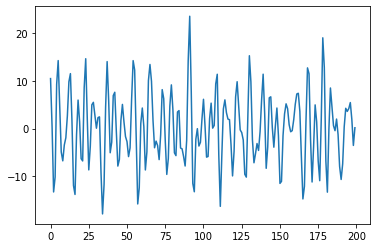

In [4]:
n = 200
t = np.linspace(0, n-1, n)
y = N[2,0:n]
yt = spfft.dct(y, norm='ortho')
plt.plot(y)
y


In [149]:
m = 10*2 #% #sample n//2  
ri = np.random.choice(n, m, replace=False) # random sample of indices

ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

In [150]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho',  axis=0)
A = A[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [(A*vx - y2) ==0]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +2e+03  8e-01  1e-02  1e+00  4e+00    ---    ---    1  1  - |  -  - 
 1  +1.611e+02  +1.613e+02  +6e+02  5e-01  5e-03  6e-01  2e+00  0.6515  1e-01   0  0  1 |  0  0
 2  +1.709e+02  +1.714e+02  +4e+02  2e-01  3e-03  8e-01  9e-01  0.8814  5e-01   0  0  0 |  0  0
 3  +1.989e+02  +1.991e+02  +1e+02  5e-02  8e-04  3e-01  3e-01  0.6735  2e-02   1  0  0 |  0  0
 4  +2.067e+02  +2.067e+02  +4e+01  1e-02  2e-04  8e-02  9e-02  0.8444  2e-01   1  0  0 |  0  0
 5  +2.084e+02  +2.085e+02  +1e+01  5e-03  8e-05  3e-02  3e-02  0.6924  5e-02   1  0  0 |  0  0
 6  +2.091e+02  +2.091e+02  +4e+00  2e-03  3e-05  9e-03  9e-03  0.8289  2e-01   1  0  0 |  0  0
 7  +2.092e+02  +2.092e+02  +1e+00  4e-04  7e-06  2e-03  2e-03  0.8452  1e-01   1  0  0 |  0  0
 8  +2.093e+02  +2.093e+02  +1e-02  6e-06  1e-

C:\Users\Hamed\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


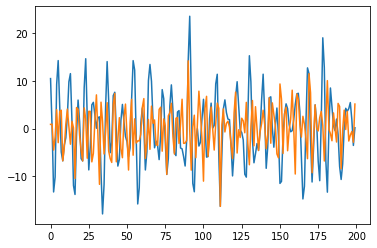

In [151]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)
import matplotlib.pyplot as plt
x.shape
plt.plot(t,y,t,sig)


In [152]:
dataArray = [y,sig]
df = pd.DataFrame(dataArray)
df.to_csv('MC2MatlabFig10.csv',index=False)

In [18]:
X = 2
n = 100
t = np.linspace(0, n, n)
x = np.linspace(0, 99, 100)
y = N[2,0:100]
xvals = np.linspace(0, 99, X*100-1)
yinterp = np.interp(xvals, x, y)
# plt.plot(x,y,'r')
# plt.plot(xvals,yinterp,'b')
yt = spfft.dct(yinterp, norm='ortho')

In [19]:
n = X*100-1
t = np.linspace(0, n, n)
m = 100
a_list = np.array(range(1, m))
ri = X*a_list
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = yinterp[ri]

In [20]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]
# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [(A*vx - y2)==0]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +6e+03  9e-01  1e-02  1e+00  2e+01    ---    ---    1  1  - |  -  - 
 1  +2.461e+02  +2.475e+02  +2e+03  6e-01  4e-03  2e+00  5e+00  0.7652  1e-01   0  0  0 |  0  0
 2  +3.844e+02  +3.849e+02  +5e+02  2e-01  9e-04  5e-01  1e+00  0.7720  4e-02   1  0  1 |  0  0
 3  +4.575e+02  +4.576e+02  +1e+02  4e-02  2e-04  2e-01  3e-01  0.7575  2e-02   1  0  1 |  0  0
 4  +4.826e+02  +4.827e+02  +4e+01  1e-02  6e-05  6e-02  1e-01  0.7926  1e-01   1  1  1 |  0  0
 5  +4.892e+02  +4.892e+02  +1e+01  3e-03  2e-05  2e-02  3e-02  0.7705  5e-02   1  1  1 |  0  0
 6  +4.908e+02  +4.908e+02  +4e+00  1e-03  5e-06  6e-03  9e-03  0.7217  7e-02   1  1  1 |  0  0
 7  +4.915e+02  +4.915e+02  +9e-01  3e-04  1e-06  2e-03  2e-03  0.7970  6e-02   1  1  1 |  0  0
 8  +4.917e+02  +4.917e+02  +2e-01  6e-05  3e-

C:\Users\Hamed\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [21]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)
import matplotlib.pyplot as plt



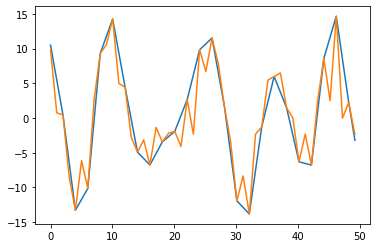

In [22]:
plt.plot(t[:50],yinterp[:50],t[:50],sig[:50])

NameError: name 'paths' is not defined